[Shubhankar Jaiswal ], [21f1006828@ds.study.iitm.ac.in], [BS/4th Year]

---
## Instructions
  
*   make a copy of this notebook
*   write your name as the first block of the copied notebook
*   complete the codes in the spaces below
*   share the saved notebook to [ -- email id here --]

## Good practices
*   avoid single alphabet variable names, use meaningful names
*   use typing in function signatures [https://docs.python.org/3/library/typing.html]
*   use lambdas, partials to improve readability [https://docs.python.org/3/library/functools.html]
*   use builtin datatypes as much as possible [https://docs.python.org/3/library/collections.html]
*   use exception handling [https://docs.python.org/3/tutorial/errors.html#handling-exceptions]
*   write docstring comments and inline comments to make the code self-explanatory


**PS**: These are individual exercises. In comments against your solutions, provide web links/blogs/documents that you used to solve the exercises. Do not use chatGPT

### Library Import for all tasks

In [ ]:

import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression, make_circles
from sklearn.metrics import r2_score
import warnings
from sklearn.ensemble import AdaBoostClassifier
import keras
from keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
warnings.filterwarnings('ignore')

# **Task 1**

**1. We have given you a csv file called placements which contains some information of students regarding their placements. Your task is to make a multiple linear regressoin class of your own and predict and give the r2 score for the test data.**

**The percentage of data to split into training and testing is predefined to be test_size = 0.2**

**Or you can use the following code snippet to split the data**

*x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)*

#### Creating the Dataset

In [ ]:
df = pd.read_csv('placement.csv')
df.head()
X = df.drop(columns=['package'])
y = df['package']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [ ]:
import numpy as np
import warnings

class NewLR:
    def __init__(self, learning_rate=0.01, max_iter=1000, random_state=None):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.random_state = random_state
        self.coef_ = None
        self.intercept_ = None
        self.loss_history = []

    def _initialize_parameters(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        self.coef_ = np.random.randn(X.shape[1])
        self.intercept_ = np.random.randn()

    def fit(self, X, y):
        self._initialize_parameters(X)

        for _ in range(self.max_iter):
            y_pred = self.predict(X)
            loss = self._compute_loss(y, y_pred)
            self.loss_history.append(loss)

            gradient_coef = (2 / X.shape[0]) * X.T @ (y_pred - y)
            gradient_intercept = (2 / X.shape[0]) * np.sum(y_pred - y)

            self.coef_ -= self.learning_rate * gradient_coef
            self.intercept_ -= self.learning_rate * gradient_intercept

    def predict(self, X):
        return X @ self.coef_ + self.intercept_

    def _compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)


In [ ]:
# Use the NewLR to generate y_pred below
model = NewLR()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
r2_score(y_test, y_pred)

0.7782492077719764

# **Task 2**

**2. You have to create a new class called GDRegressor, which will be a gradient descent class. You have to use that class to predict the y value of a simple linear regression dataset generated randomly**

**The code snippet is given below use that to get started**

In [ ]:
X,y = make_regression(n_samples=500, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

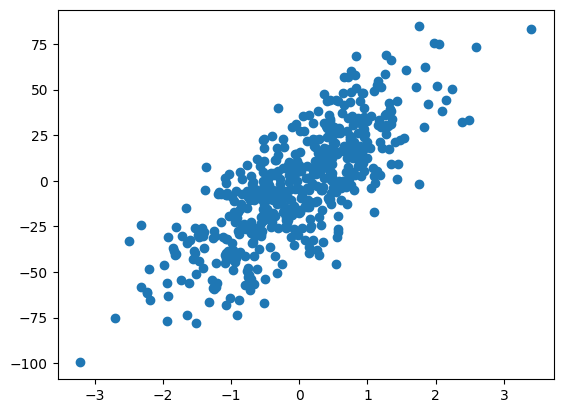

In [ ]:
plt.scatter(X,y)
plt.show()

In [ ]:
import numpy as np

class GDRegressor:
    def __init__(self, learning_rate: float, epochs: int, random_state: int = 42):
        np.random.seed(random_state)  # Set the random seed for reproducibility
        self.m = np.random.rand()  # Initialising the slope randomly
        self.b = np.random.rand()  # Initialising the intercept randomly
        self.alpha = learning_rate  # Learning rate for gradient descent
        self.epochs = epochs  # Number of iterations for training

    def fit(self, X, y):
        X = X.ravel()  # Flatten the input array
        n_samples = X.shape[0]  # Number of samples in the dataset

        for _ in range(self.epochs):
            y_pred = self.m * X + self.b  # Predicted values
            # Calculate gradients
            w_grad = (1 / n_samples) * np.dot(X, (y_pred - y))
            b_grad = (1 / n_samples) * np.sum(y_pred - y)
            # Update parameters
            self.m -= self.alpha * w_grad
            self.b -= self.alpha * b_grad

        print(f"Slope (m): {self.m}, Intercept (b): {self.b}")

    def predict(self, X):
        return self.m * X + self.b  # Return the predicted values


In [ ]:
# Creating an instance of GDRegressor
gd = GDRegressor(learning_rate=0.001, epochs=10000)

# Fitting the model to the training data
gd.fit(X_train, y_train)

# Using the fitted model to make predictions on the test data
y_pred = gd.predict(X_test.reshape(-1, 1))  # Reshape X_test to be a 2D array with one column


Slope (m): 24.961335856996474, Intercept (b): -2.3687175894549144


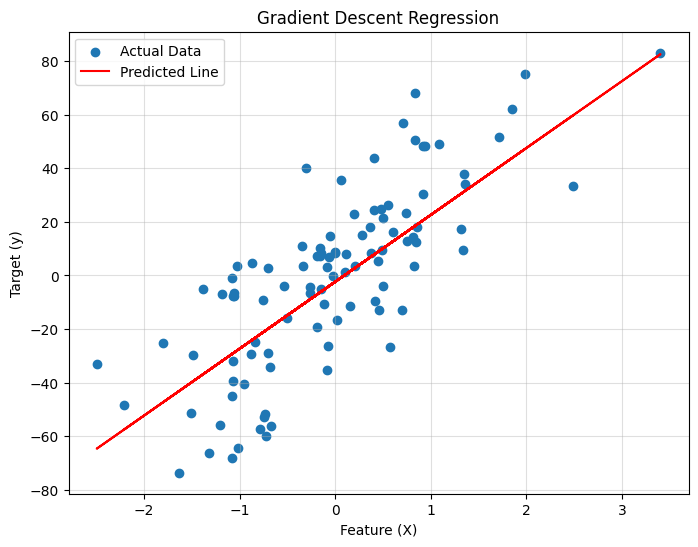

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Adjusting figure size for better visualization
plt.scatter(X_test, y_test, label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Predicted Line')
plt.title('Gradient Descent Regression')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.legend()  # Showing the legend to distinguish between the lines
plt.grid(alpha=0.4)  #Subtle grid for better readability
plt.show()


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5942837995164336

# **Task 3**

**You have to use Polynomail logistic regression class and get the accuracy score of more than 0.75 and also plot the decision boundary in the following**

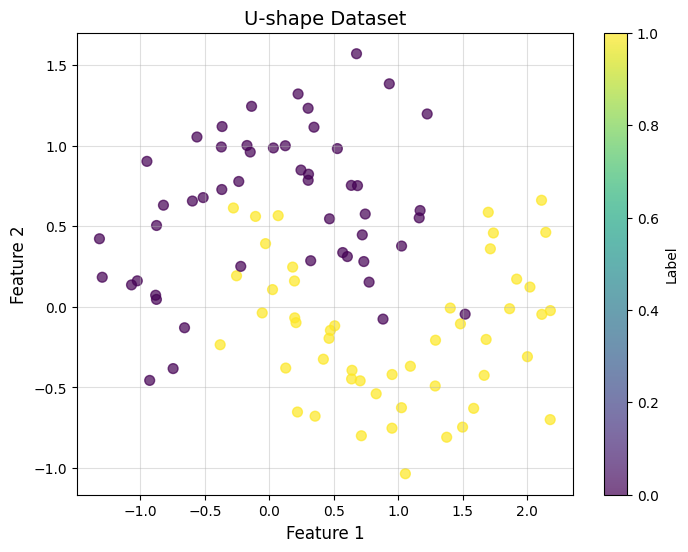

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Loading the data
df = pd.read_csv('ushape.csv', header=None, names=['Feature1', 'Feature2', 'Label'])  # Assigning column names for clarity

# Splitting into features (X) and labels (y)
X = df[['Feature1', 'Feature2']]
y = df['Label']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

# Visualising the data
plt.figure(figsize=(8, 6))  #Adjusting plot size for better visibility
plt.scatter(X['Feature1'], X['Feature2'], c=y, cmap='viridis', s=50, alpha=0.7)  # c=y colors by label
plt.title('U-shape Dataset', fontsize=14)
plt.xlabel('Feature 1', fontsize=12)
plt.ylabel('Feature 2', fontsize=12)
plt.colorbar(label='Label')  # Adding a colorbar to explain the label mapping
plt.grid(alpha=0.4)
plt.show()


In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#pipeline
model = LogisticRegression(n_jobs=-1, max_iter=1000)  # Increased default max_iter
transformer = PolynomialFeatures()
pipe = Pipeline([("transformer", transformer), ("model", model)])

#hyperparameter grid
param_grid = {
    "model__C": np.logspace(-1, 2, 10),  # Using a logarithmic scale for C
    "model__solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "model__class_weight": ["balanced", None],
    "model__multi_class": ["auto", "ovr", "multinomial"],
    "transformer__degree": [2, 3],
    "transformer__interaction_only": [True, False],
}

#GridSearchCV
grid_search = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1, scoring=["accuracy", "f1"], refit="accuracy")

# Uncomment these lines to perform the grid search
# grid_search.fit(X_train, y_train)
# best_params = grid_search.best_params_
# print(best_params)

# Seting the pipeline with the best parameters (replace with actual best_params if grid search is performed)
params = {
    'model__C': 20.1,
    'model__class_weight': 'balanced',
    'model__max_iter': 1000,
    'model__multi_class': 'multinomial',
    'model__solver': 'newton-cg',
    'transformer__degree': 3,
    'transformer__interaction_only': False
}
pipe.set_params(**params)


Pipeline(steps=[('transformer', PolynomialFeatures(degree=3)),
                ('model',
                 LogisticRegression(C=20.1, class_weight='balanced',
                                    max_iter=1000, multi_class='multinomial',
                                    n_jobs=-1, solver='newton-cg'))])

Accuracy: 0.9600


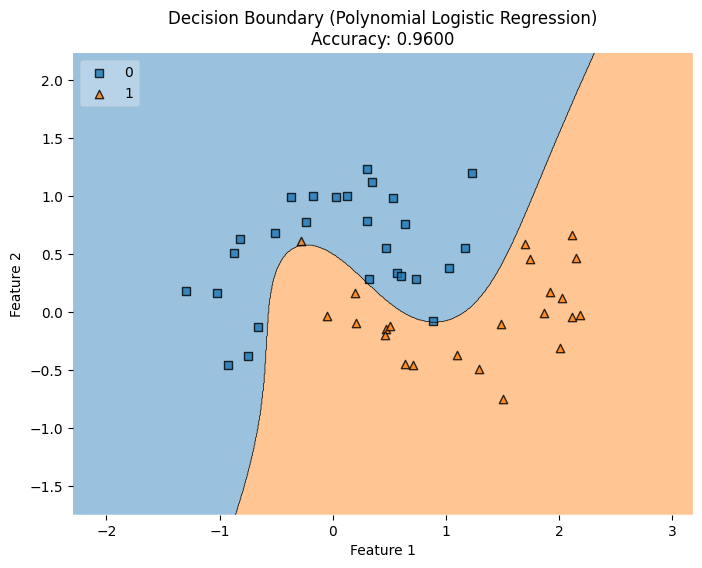

F1: 0.9600


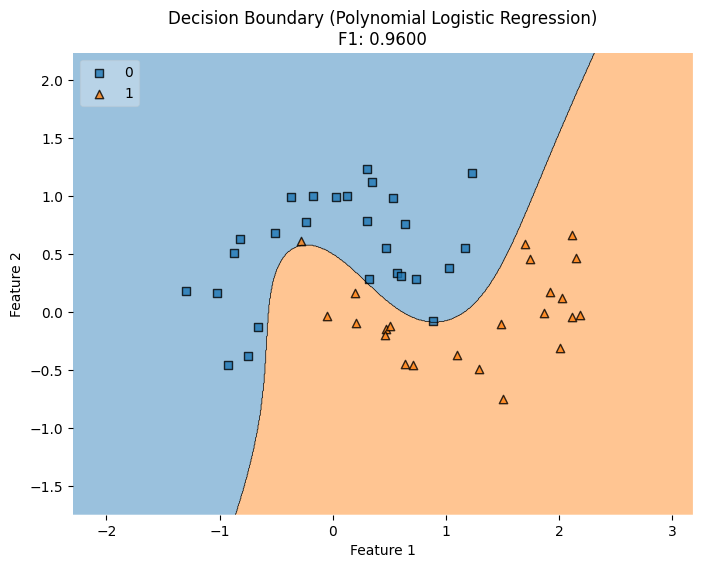

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Function to plot decision boundary with the pipeline
def plot_decision_boundary(X, y, pipe_params=params, scoring='accuracy'):
    y = y.astype(np.int64)

    pipe = Pipeline([
        ("transformer", PolynomialFeatures()),
        ("model", LogisticRegression(n_jobs=-1, max_iter=1000))
    ])
    pipe.set_params(**pipe_params)

    # Fittingh the pipeline and perform cross-validation
    pipe.fit(X, y)
    cv_scores = cross_val_score(pipe, X, y, scoring=scoring, cv=10)
    mean_score = np.mean(cv_scores)

    # Printing the cross-validation score
    print(f"{scoring.capitalize()}: {mean_score:.4f}")

    # Plotting the decision boundary
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X.values, y.values, clf=pipe, legend=2)
    plt.title(f'Decision Boundary (Polynomial Logistic Regression)\n{scoring.capitalize()}: {mean_score:.4f}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


# Example usage
plot_decision_boundary(X_test, y_test)  # Plot with default accuracy scoring
plot_decision_boundary(X_test, y_test, scoring='f1')  # Plot with F1 score


# **Task 4**

**4. In this task you have to write a perceptron algorithm. Than on a dataset apply adaboost classifier by GridSearchCV. Code for plotting the decision boundary is already given**

In [ ]:
def plot_decision_boundary(clf, model_name: str = "Adaboost Classifier", ax=None) -> None:
    X, y = make_circles(n_samples=500, factor=0.1, noise=0.2, random_state=42)
    plotter = None
    if ax is None:
        plotter = plt
        plotter.figure(figsize=(6, 4))
    else:
        plotter = ax
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plotter.contourf(xx1, xx2, y_hat, alpha=0.2)
    plotter.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    if ax is None:
        plotter.title(f"{model_name} Decision Boundary")
        plotter.show()
    else:
        plotter.set_title(f"{model_name} Decision Boundary")

In [ ]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [ ]:
import numpy as np

class Perceptron:
    """A simple implementation of the Perceptron algorithm for binary classification."""

    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None
        self.errors_ = []

    def _net_input(self, X):
        """Calculates the net input (weighted sum of inputs plus bias)."""
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        """Predicts the class labels for the given input samples."""
        return np.where(self._net_input(X) >= 0.0, 1, 0)

    def fit(self, X, y):
        """Trains the Perceptron on the given training data."""
        n_samples, n_features = X.shape

        # Initialising weights and bias to zeros
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.max_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))
                self.weights += update * xi
                self.bias += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            if errors == 0:
                break  # Stop early if no errors in an epoch

        return self  # Allow method chaining


In [ ]:
model = Perceptron(learning_rate=0.1, max_iter=300)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == y_test)

**Accuracy**

| Test Data Size | Accuracy |
|-------|----------|
| 0.5 | 0.96|



Average Perceptron Accuracy  = `0.491`

<h4 style="color:black;b"> Adaboost Classifier - Baseline Performance</h4>

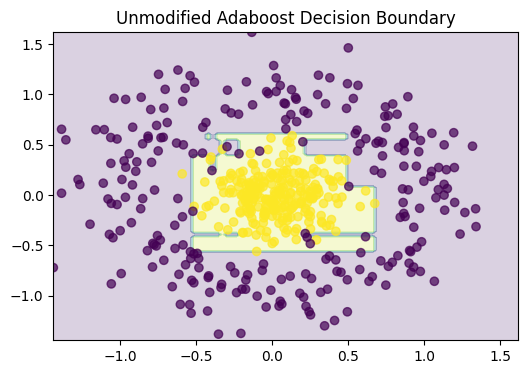

In [ ]:
model =  AdaBoostClassifier(random_state=19)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plot_decision_boundary(model, "Unmodified Adaboost")


#### Param Grid

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

param_grid = {
    'estimator': [DecisionTreeClassifier(random_state=42, max_depth=1)],
    'n_estimators': list(range(40, 101, 5)),
    'learning_rate': np.linspace(0.1, 1.0, 20),
    'algorithm': ['SAMME', 'SAMME.R']  # Including both SAMME and SAMME.R for comparison
}


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report



# the AdaBoost Classifier
model = AdaBoostClassifier(random_state=42)

# Performing Grid Search
grid_result = GridSearchCV(model, param_grid, cv=5, n_jobs=-1,
                           scoring=['accuracy', 'balanced_accuracy'],
                           refit='balanced_accuracy', return_train_score=False)
grid_result.fit(X_train, y_train)

# Getting the best model
best_model = grid_result.best_estimator_

#predictions on the test set
y_pred = best_model.predict(X_test)




Best: 0.956818 using {'algorithm': 'SAMME', 'estimator': DecisionTreeClassifier(max_depth=1, random_state=42), 'learning_rate': 0.9526315789473684, 'n_estimators': 50}
Accuracy Score on test data: 0.9771428571428571


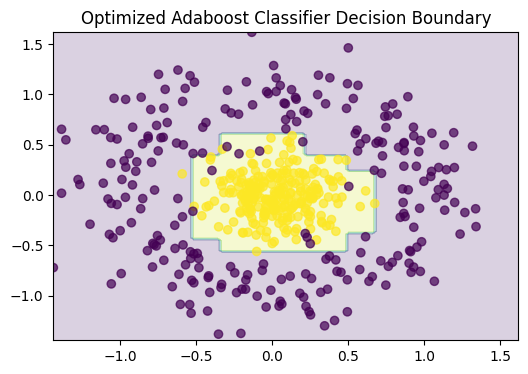

In [ ]:
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) # define grid_result from your side
print(f"Accuracy Score on test data: {sklearn.metrics.accuracy_score(y_test, y_pred)}")
plot_decision_boundary(grid_result, "Optimized Adaboost Classifier")

# **Task 5**

**5. You have to use different ML models to classify the Flowers from a common dataset iris. Models to be used are :- Logistic Regression, Support Vector Machine, KNN and Naive Bayes**

**Accuracy should be more than 90% in all the models. Also you have to do the filteration and data cleaning if required, this is a complete prediction model task.**

**Add some plots of the data to showcase your approach**

In [ ]:
iris = pd.read_csv('iris.csv')

In [ ]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


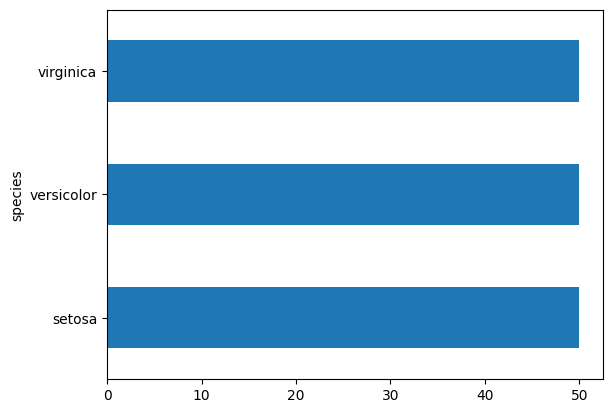

In [ ]:
iris['species'].value_counts().plot(kind='barh')
plt.show()

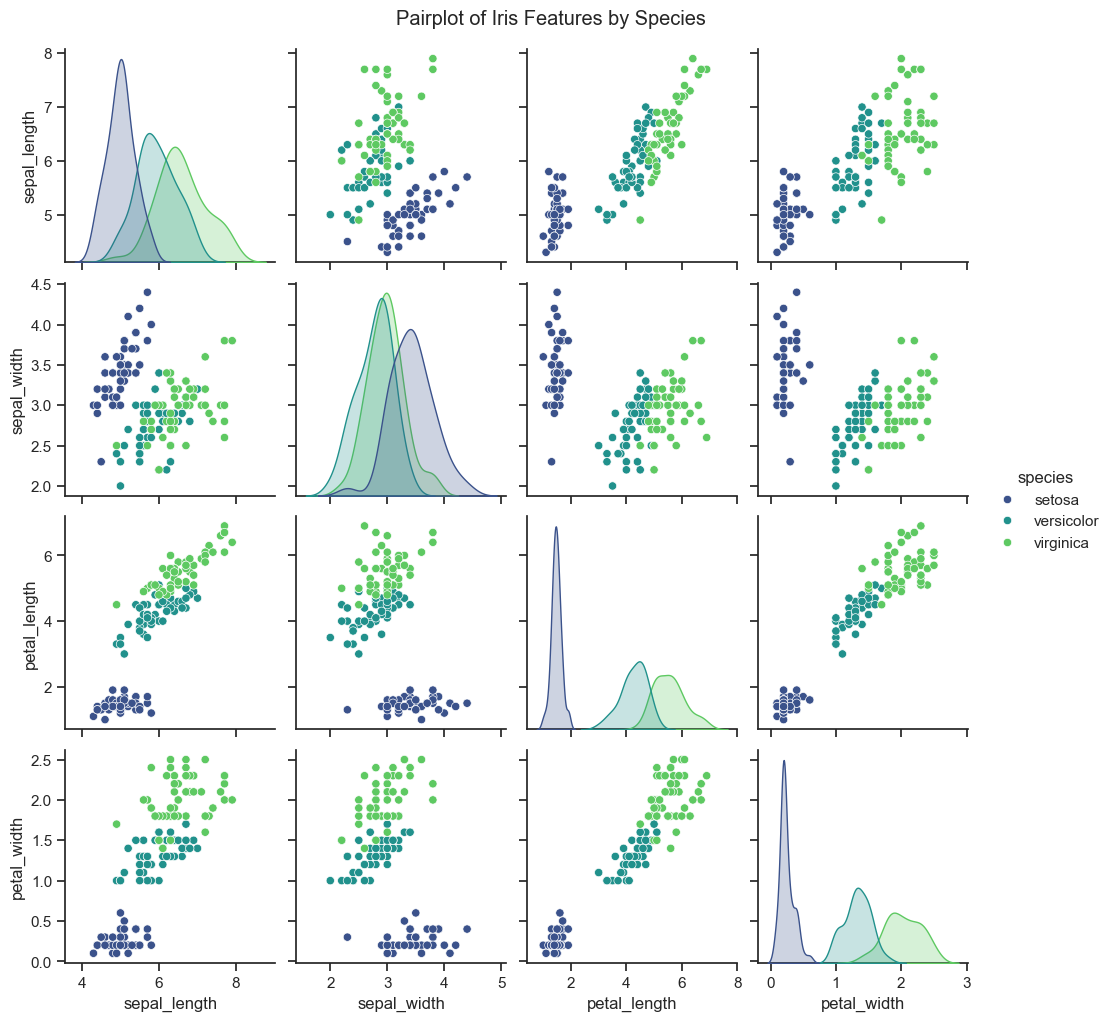

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.set(style="ticks")
sns.pairplot(iris, hue='species', palette='viridis', height=2.5, diag_kind='kde')

# Additional customizations
plt.suptitle("Pairplot of Iris Features by Species", y=1.02)  # Adding a title
plt.show()


##### Feature Transform and Label Encoding

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Splitting features and target
X = iris.drop(columns="species")
y = iris["species"]

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Encoding the labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


**Logistic Regressoin Model**

Accuracy Score on Test Data: 0.99


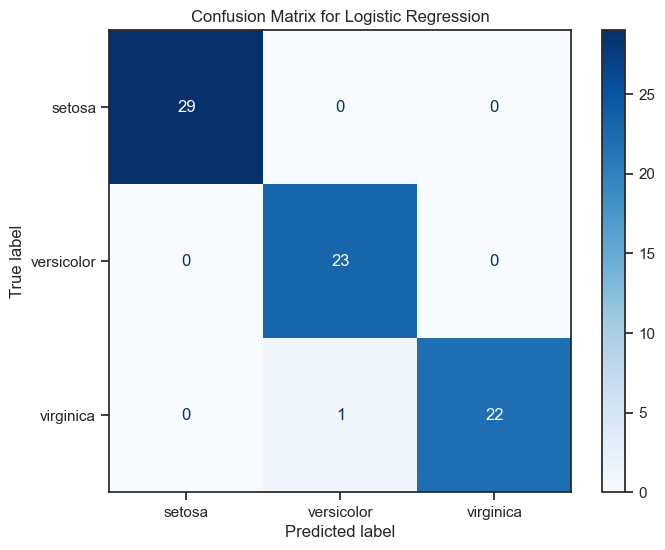

In [ ]:
import sklearn.metrics
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import  StandardScaler


# Creating and Fit the Model
model = LogisticRegressionCV(
    Cs=20,
    cv=5,
    max_iter=10000,
    n_jobs=-1,
    penalty="elasticnet",
    solver="saga",
    l1_ratios=[0.1, 0.5, 0.9],
    class_weight="balanced",
    random_state=42,  # Added for reproducibility
)

pipe = make_pipeline(StandardScaler(), model)
pipe.fit(X_train, y_train)

# Predict and Evaluate
y_pred = pipe.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

# Display Results
print(f"Accuracy Score on Test Data: {accuracy:.2f}")

cm_display = sklearn.metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=le.classes_
)

# More informative plot with labels
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)
ax.set_title("Confusion Matrix for Logistic Regression")
plt.show()


**Support Vector Machine**

Best Hyperparameters: {'svm_model__C': 129.15496650148827, 'svm_model__class_weight': 'balanced', 'svm_model__gamma': 0.005994842503189409, 'svm_model__kernel': 'rbf'}
Accuracy Score on Test Data: 0.973


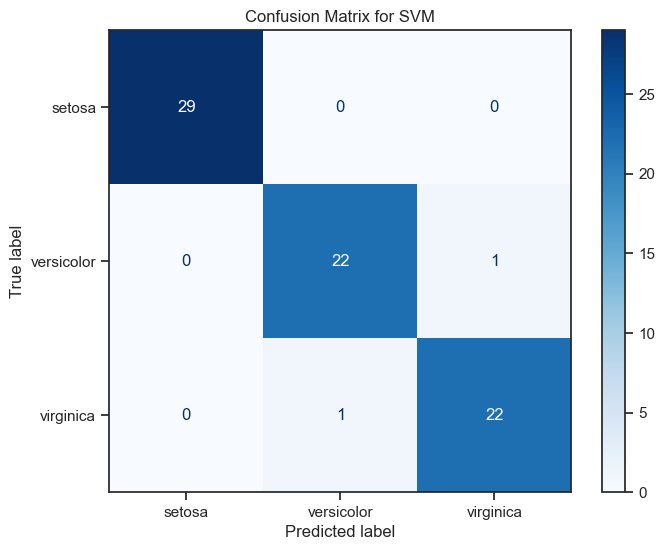

In [ ]:
import sklearn.metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline




# Creating the SVM Classifier
model = SVC(random_state=42)  # Adding random_state for reproducibility

#  Hyperparameter Grid
param_grid = {
    "svm_model__C": np.logspace(-1, 3, 10),  # Use logarithmic scale for C
    "svm_model__gamma": np.logspace(-4, 0, 10), # Use logarithmic scale for gamma
    "svm_model__kernel": ["rbf", "poly", "sigmoid"],
    "svm_model__class_weight": ["balanced", None],
}

#  Pipeline
pipe = Pipeline(steps=[("scaler", StandardScaler()), ("svm_model", model)])

# Perform Grid Search
grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring=['accuracy', 'balanced_accuracy'],
    refit='balanced_accuracy',
    return_train_score=False
)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Setting model to best estimator found in grid search
model = grid_search.best_estimator_

# Predict and Evaluate
y_pred = model.predict(X_test)

accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)

# Display Results
print(f"Accuracy Score on Test Data: {accuracy:.3f}")

cm_display = sklearn.metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=le.classes_
)

# More informative plot with labels
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)
ax.set_title("Confusion Matrix for SVM")
plt.show()


**Use KNN**

Best Hyperparameters: {'knn__algorithm': 'auto', 'knn__leaf_size': 10, 'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'distance'}
Accuracy on Test Data: 0.9867
Balanced Accuracy on Test Data: 0.9855


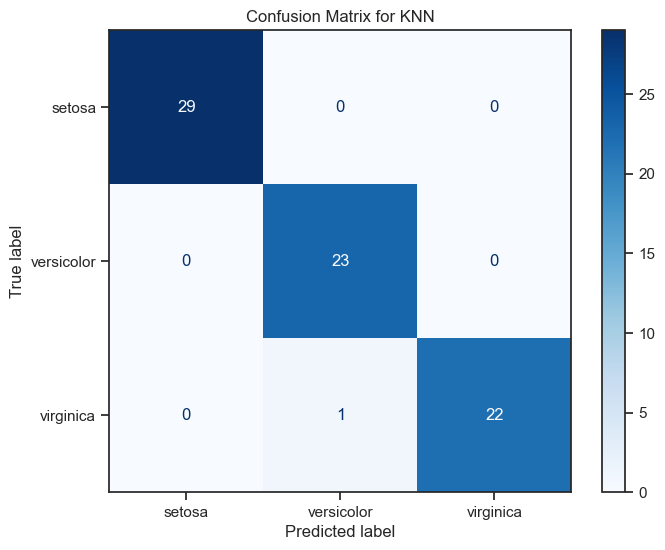

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report



# Creating the KNeighborsClassifier model
model = KNeighborsClassifier(n_jobs=-1)  # n_jobs=-1 for parallelism

# Hyperparameter Grid
param_grid = {
    'knn__n_neighbors': list(range(1, 21,4)),
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__leaf_size': list(range(10, 51, 10)),
    'knn__p': [1, 2],
}

#  Pipeline
pipe = Pipeline(steps=[("scaler", StandardScaler()), ("knn", model)])
#  Grid Search
grid_search = GridSearchCV(
    pipe,
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring=['accuracy', 'balanced_accuracy'],
    refit='balanced_accuracy',
    return_train_score=False
)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Setting model to best estimator found in grid search
model = grid_search.best_estimator_

# Predict and Evaluate
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

print(f"Accuracy on Test Data: {accuracy:.4f}")
print(f"Balanced Accuracy on Test Data: {balanced_accuracy:.4f}")
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=le.classes_
)

# More informative plot with labels
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)
ax.set_title("Confusion Matrix for KNN")
plt.show()


**Use Naive Bayes**

In [ ]:
del grid_search

Best Parameters: {'var_smoothing': 0.02848035868435802}
Accuracy Score on test data: 0.97


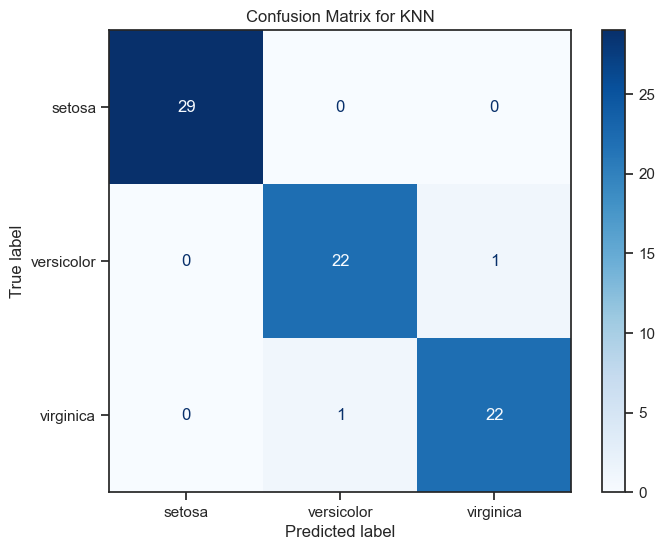

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np


# Data Preparation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Model and Parameter Search
model = GaussianNB()
param_grid = {
     "var_smoothing": np.logspace(0, -9, num=100) # Explore smoothing values
}


grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,                     # 5-fold cross-validation
    scoring='accuracy',       # Optimize for accuracy
    n_jobs=-1,               # Use all available processors
)
grid_search.fit(X_train_scaled, y_train)

# Best Model and Accuracy
best_model = grid_search.best_estimator_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {grid_search.best_params_}")
print(
    f"Accuracy Score on test data: {sklearn.metrics.accuracy_score(y_test, y_pred):.2f}"
)

confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_pred)
cm_display = sklearn.metrics.ConfusionMatrixDisplay(
    confusion_matrix=confusion_matrix, display_labels=le.classes_
)

# More informative plot with labels
fig, ax = plt.subplots(figsize=(8, 6))
cm_display.plot(ax=ax, cmap=plt.cm.Blues)
ax.set_title("Confusion Matrix for KNN")
plt.show()

# **Task 6**

**You are given a dataset containing images of different animals (e.g., cats, dogs, birds). Your task is to build a convolutional neural network (CNN) model to classify these images into their respective categories.**

**You have to use CIFAR-10 dataset whose code is present below. You need to show the performce of your model after each epochs**

The output from one such model is present below using 10 epochs

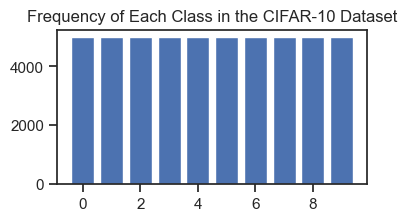

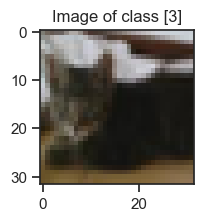

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

unique, freq = np.unique(train_labels.ravel(), return_counts=True)
plt.figure(figsize=(4,2))
plt.bar(unique, freq)
plt.title("Frequency of Each Class in the CIFAR-10 Dataset")
plt.show()
# Get the first image from the training set.
image = train_images[9]
label = train_labels[9]

# Display the image.
plt.figure(figsize=(2,2))
plt.imshow(image,)
plt.title(f"Image of class {label}")
plt.show()

##### Data Preprocessing, Augmentation and Label Encoding

In [ ]:
## Image Preprocessing and Data Generation

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [ ]:


# Data Augmentation
img_generator = ImageDataGenerator(
    width_shift_range=0.1,  # Range (as a fraction of total width) for random horizontal shifts
    height_shift_range=0.1,  # Range (as a fraction of total height) for random vertical shifts
    horizontal_flip=True,  # Randomly flip inputs horizontally
    fill_mode='nearest',  # Strategy to fill newly created pixels, which can appear after a rotation or a width/height shift
    validation_split=0.2  # Set the validation split; 20% of the data will be used for validation
)
img_generator.fit(train_images)
batch_size = 64
train_data = img_generator.flow(train_images, train_labels, batch_size=batch_size)



 ### sequential network

In [ ]:
from keras.layers import Conv2D, MaxPool2D
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_175 (Conv2D)             │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_89          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_176 (Conv2D)             │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_90          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_177 (Conv2D)             │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_91          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_178 (Conv2D)             │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_92          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_179 (Conv2D)             │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_93          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_180 (Conv2D)             │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_94          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         1,29

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
# Compiling the model using Keras API
# Initialising the Adam optimizer with a starting learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Reducing learning rate when a metric has stopped improving
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=2,
                              min_lr=0.00005,
                              verbose=1
)

# Using sparse categorical crossentropy as the loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Log training process data for visualization in TensorBoard
tensorboard = tf.keras.callbacks.TensorBoard(log_dir="./logs")

# Saving the best model based on validation accuracy
checkpoint_filepath = 'checkpoint.model.keras'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',  # Monitor validation accuracy
    mode='max',              # Save the model with the highest validation accuracy
    save_best_only=True      # Only save the best model
)

# List of callbacks to be used during training
callbacks = [reduce_lr, tensorboard, model_checkpoint_callback]

# Compiling the model with the specified optimizer, loss function, and evaluation metric
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=["accuracy"]
)


In [ ]:
# Model training
history = model.fit(
    train_data,
    epochs=50,
    callbacks=callbacks,
    validation_data=(test_images, test_labels),
)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 139s 162ms/step - accuracy: 0.3318 - loss: 1.9195 - val_accuracy: 0.5673 - val_loss: 1.2193 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 131ms/step - accuracy: 0.5407 - loss: 1.2841 - val_accuracy: 0.6355 - val_loss: 1.0186 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 121ms/step - accuracy: 0.6263 - loss: 1.0720 - val_accuracy: 0.6875 - val_loss: 0.8837 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 94s 120ms/step - accuracy: 0.6679 - loss: 0.9481 - val_accuracy: 0.7107 - val_loss: 0.8487 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 126ms/step - accuracy: 0.7013 - loss: 0.8636 - val_accuracy: 0.7246 - val_loss: 0.8224 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 95s 121ms/step - accuracy: 0.7283 - loss: 0.7970 - val_accuracy: 0.7443 - val_loss: 0.7460 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 131ms/step - accuracy: 

In [ ]:
model.save('sequential_4-cifar10.keras')

313/313 - 5s - 15ms/step - accuracy: 0.8695 - loss: 0.3978

Test Accuracy: 0.8695
Test Loss: 0.3978


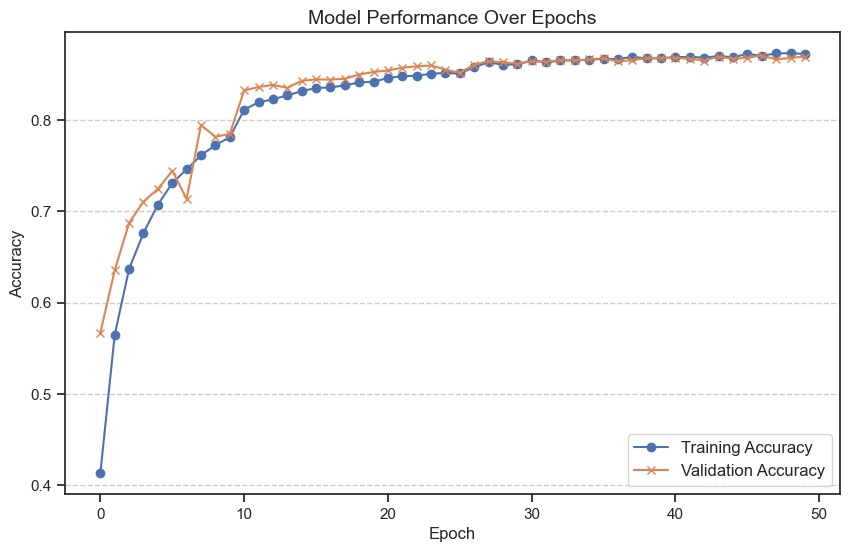

In [ ]:
# Evaluating model performance
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Visualize training progress (performance plot)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # figure size for better readability
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Model Performance Over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.show()


# **Task 7**

**You are given a dataset containing text reviews (e.g., movie reviews, product reviews). Your task is to build a recurrent neural network (RNN) model to perform sentiment analysis on these reviews, i.e., classify them into positive or negative sentiment categories.**

**You have to use imdb dataset whose code is present below. You need to show the performce of your model after each epochs**

**To refere about the RNN and sentiment analysis:-** https://www.tensorflow.org/tutorials/keras/text_classification

The output from one such model is present below using 5 epochs

In [ ]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences

# Loading IMDb Dataset
max_features = 10000       # Considering only the top 10,000 most frequent words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

# Pad Sequences (Ensure consistent length for model input)
max_sequence_length = 256

# Padding = 'post' adds padding after the sequence if it's shorter
# Truncating = 'post' removes words from the end if the sequence is longer
train_data = pad_sequences(train_data, maxlen=max_sequence_length, padding='post', truncating='post')
test_data = pad_sequences(test_data, maxlen=max_sequence_length, padding='post', truncating='post')


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense
from keras import metrics

# Model Architecture
model = Sequential()

# Embedding layer for word representation
model.add(Embedding(input_dim=num_words, output_dim=128, input_length=max_length))

# Bidirectional LSTM layers for capturing context
model.add(Bidirectional(LSTM(64, return_sequences=True))) # Returns sequences for the next LSTM
model.add(Bidirectional(LSTM(64)))

# Dense output layer for classification (sigmoid for binary output)
model.add(Dense(1, activation='sigmoid'))

# Compile Model
model.compile(
    optimizer='adam',              # Adam is often a good default
    loss='binary_crossentropy',   # Appropriate for binary classification (positive/negative reviews)
    metrics=['accuracy', metrics.AUC()]  # Track accuracy and AUC (Area Under the ROC Curve)
)

# Model Summary
model.summary()

# Train Model (with early stopping for potential overfitting)
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history = model.fit(
    train_data, train_labels,
    epochs=10,                    # Start with more epochs, but early stopping will help
    batch_size=32,
    validation_data=(test_data, test_labels),
    callbacks=[early_stopping]   # Add early stopping callback
)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 158s 192ms/step - accuracy: 0.6629 - auc: 0.7256 - loss: 0.5986 - val_accuracy: 0.7693 - val_auc: 0.8579 - val_loss: 0.5048
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 155s 197ms/step - accuracy: 0.8327 - auc: 0.8998 - loss: 0.4000 - val_accuracy: 0.8334 - val_auc: 0.9210 - val_loss: 0.3681
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 156s 199ms/step - accuracy: 0.8897 - auc: 0.9503 - loss: 0.2827 - val_accuracy: 0.8336 - val_auc: 0.9294 - val_loss: 0.3589
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 159s 203ms/step - accuracy: 0.9135 - auc: 0.9683 - loss: 0.2241 - val_accuracy: 0.8524 - val_auc: 0.9342 - val_loss: 0.3436
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 174s 223ms/step - accuracy: 0.9289 - auc: 0.9754 - loss: 0.1930 - val_accuracy: 0.8600 - val_auc: 0.9339 - val_loss: 0.3601
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 169s 216ms/step - accuracy: 0.9503 - auc: 0.9855 - loss: 0.1432 - val_accuracy: 0.8550 - val_auc: 0.9311 - val_loss: 0.3869


In [ ]:
# Define RNN architecture
model = Sequential([
    Embedding(num_words, 128, input_length=max_length),
    keras.layers.Bidirectional(LSTM(64,return_sequences=True)),
    keras.layers.Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')
])

# Compile your model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))


In [ ]:
model.save('bilstm-imdb.keras')

782/782 - 32s - 41ms/step - accuracy: 0.8524 - auc: 0.9342 - loss: 0.3436
Test Accuracy: 0.8524
Test Loss: 0.3436
Test AUC: 0.9342


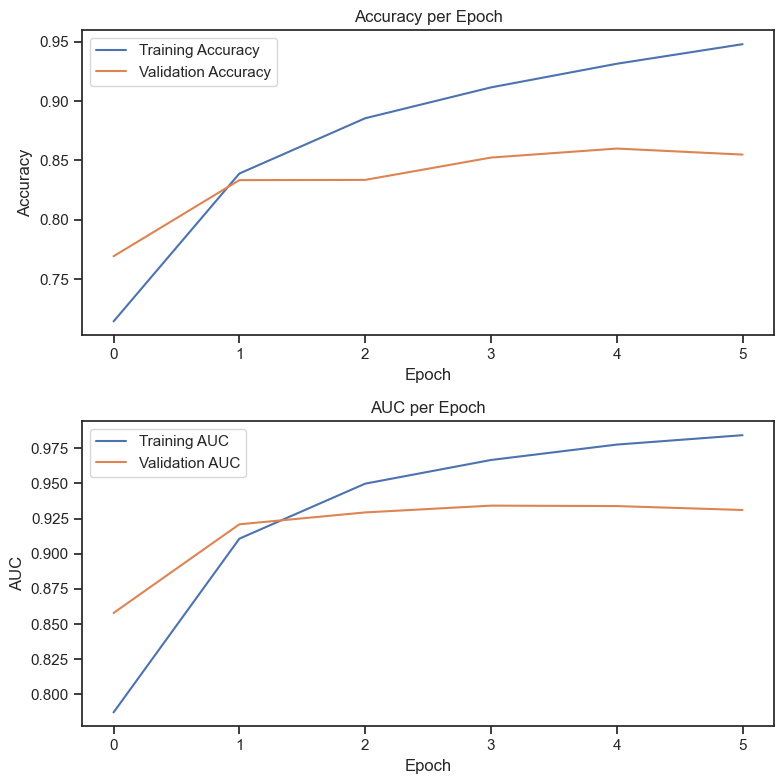

In [ ]:
# Evaluate your model
test_loss, test_acc, test_auc = model.evaluate(test_data, test_labels, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test AUC: {test_auc:.4f}")

# Plot the performance of your model by line graph in each epoch

import matplotlib.pyplot as plt

# Get epoch performance from history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_auc = history.history['auc']       # Retrieve AUC values
val_auc = history.history['val_auc']      # Retrieve validation AUC values


# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))  # Adjust figsize as needed

# Plot accuracy on the first subplot
ax1.plot(train_accuracy, label='Training Accuracy')
ax1.plot(val_accuracy, label='Validation Accuracy')
ax1.set_title('Accuracy per Epoch')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot AUC on the second subplot
ax2.plot(train_auc, label='Training AUC')
ax2.plot(val_auc, label='Validation AUC')
ax2.set_title('AUC per Epoch')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('AUC')
ax2.legend()

plt.tight_layout()
plt.show()
